# Imports

In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# EDA

EDA reference from : [kaggle](https://www.kaggle.com/code/dushyantnagar7806/book-recommender-system-project)

In [2]:
books_df = pd.read_csv('../data/Books.csv')
ratings_df = pd.read_csv('../data/Ratings.csv')
users_df = pd.read_csv('../data/Users.csv')

/var/folders/j6/j42gplfj53zg351pmh7w92v00000gn/T/ipykernel_7462/4030718727.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('../data/Books.csv')


In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# books 
print('shape of books ',books_df.shape)
print()
books_df.info()

shape of books  (271360, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
# users
print('shape of users ',users_df.shape)
print()
users_df.info()

shape of users  (278858, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
# ratings
print('shape of ratings ',ratings_df.shape)
print()
ratings_df.info()

shape of ratings  (1149780, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


<Axes: xlabel='Book-Rating'>

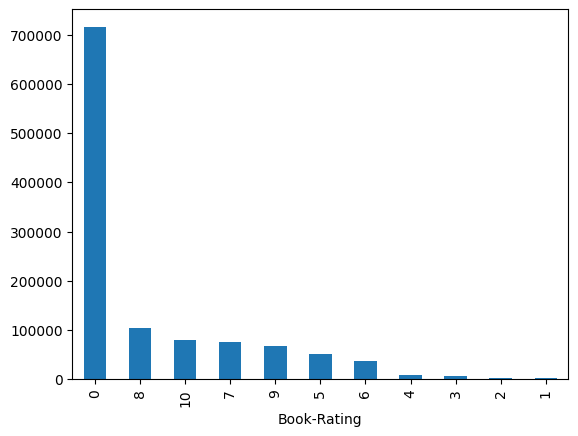

In [9]:
ratings_df['Book-Rating'].value_counts().plot(kind='bar')

In [10]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
books_df.dropna(inplace=True)

In [12]:
books_df.duplicated().sum()

0

In [13]:
books_df['Year-Of-Publication'].value_counts().index.values

array([2002, 2001, 1999, 2000, 1998, 2003, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 2004, 1986, '1999', 1985,
       '2000', '2002', '1998', '2001', 1984, 0, '1997', '1996', 1983,
       '1995', 1982, '1994', '2003', '1993', '1992', '1991', 1981, '1990',
       '1989', '1988', 1980, '1987', '1986', 1979, 1978, '1985', 1977,
       '1984', '2004', '1983', 1976, '1982', '0', '1981', 1975, '1980',
       1974, '1979', 1973, '1978', 1972, '1977', '1976', '1975', 1971,
       '1974', 1970, '1973', 1969, '1972', '1971', 1968, '1970', 1966,
       1967, 1965, 1964, '1969', 1963, 1960, 1961, 1962, 1959, '1968',
       1958, 1957, '1965', 1953, 1955, '1960', 1956, '1961', 1954, '1966',
       '1962', '1967', '1963', '1964', 1951, 2005, 1940, '1959', '1956',
       1920, '1957', '1955', 1952, 1950, '1958', '2005', '1953', 1942,
       1930, 1946, '1952', 1947, 1911, '1911', '1951', '1950', 1949, 1941,
       '1940', '1954', 1923, 1939, 1901, 1929, 1938, 1948, 1943

In [14]:
# Step 1: Filter out invalid or non-year values
valid_years = books_df['Year-Of-Publication'].astype(str).str.isnumeric()
books_df = books_df[valid_years]

# Step 2: Convert the column data to integers
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

# Step 3: Create a new datetime column from the integers representing years
books_df['Publication_Date'] = pd.to_datetime(books_df['Year-Of-Publication'], format='%Y', errors='coerce')

# Drop the old 'Year-Of-Publication' column if you don't need it anymore
books_df.drop(columns=['Year-Of-Publication'], inplace=True)

# Display the DataFrame to check the new datetime column
books_df = pd.DataFrame(books_df)

In [15]:
books_df['Year-Of-Publication'] = books_df['Publication_Date'].dt.year

In [16]:
books_df['Year-Of-Publication'].value_counts().index.values

array([2002., 1999., 2001., 2000., 1998., 1997., 2003., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       2004., 1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969.,
       1968., 1966., 1967., 1965., 1964., 1960., 1961., 1963., 1962.,
       1959., 1958., 1957., 1956., 1955., 1953., 1954., 2005., 1951.,
       1940., 1952., 1920., 1950., 1911., 1942., 1947., 1946., 1930.,
       1949., 1923., 1941., 1939., 1948., 1945., 1943., 1901., 1938.,
       2030., 1936., 1929., 1937., 1932., 1944., 1933., 1935., 2006.,
       1900., 1931., 2020., 1927., 1921., 1922., 1909., 2011., 1925.,
       1926., 2010., 1924., 1902., 2050., 1928., 1904., 2012., 2024.,
       1897., 1919., 2008., 1934., 1910., 1806., 2021., 2038., 1906.,
       1908., 1914., 1917., 2026., 2037.])

In [17]:
# this all the invalid data at this time

books_df = books_df[~(books_df['Year-Of-Publication'] == 2037)]
books_df = books_df[~(books_df['Year-Of-Publication'] == 2026)] 
books_df = books_df[~(books_df['Year-Of-Publication'] == 2030)]
books_df = books_df[~(books_df['Year-Of-Publication'] == 2050)]
books_df = books_df[~(books_df['Year-Of-Publication'] == 2038)]

/opt/homebrew/Caskroom/miniconda/base/envs/recommendation-system/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/recommendation-system/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/recommendation-system/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


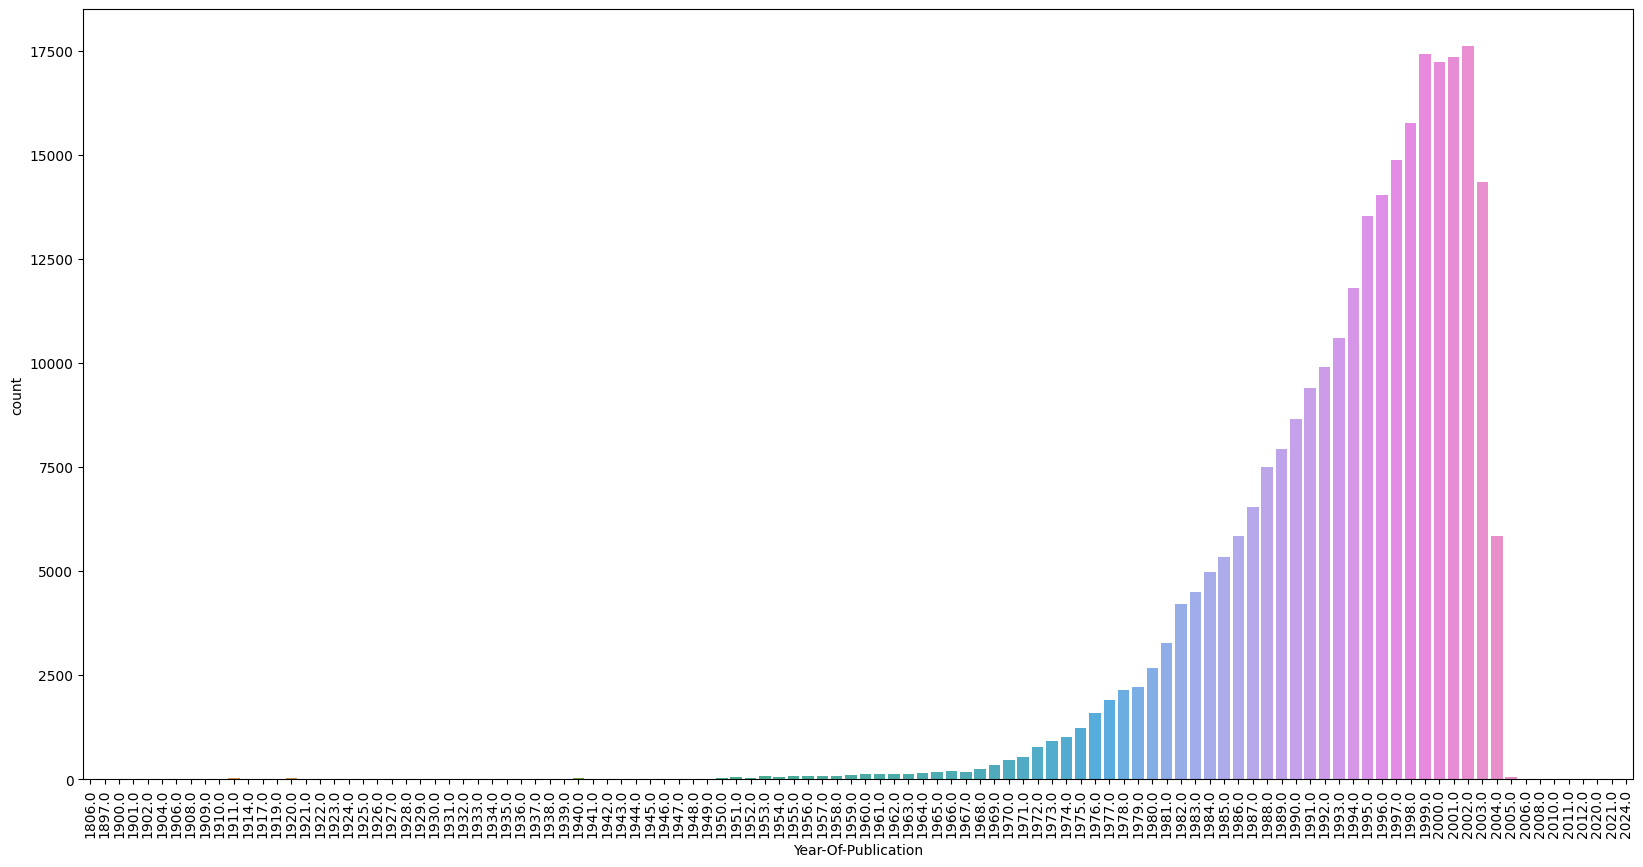

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x=books_df['Year-Of-Publication']);
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Publisher'>

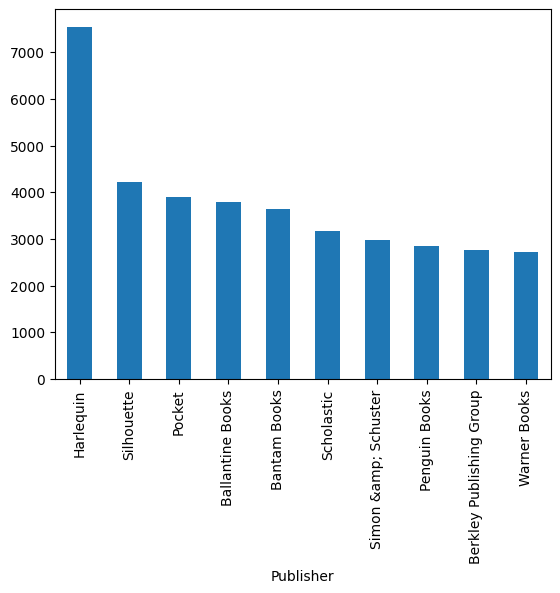

In [19]:
# top 10 Publisher
books_df['Publisher'].value_counts().head(10).plot(kind='bar')

In [20]:
round(100*(users_df.isnull().sum()/len(users_df.index)),2)

User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

In [21]:
users_df.drop('Age',axis=1,inplace=True)

In [22]:
users_df['Location'] = users_df['Location'].apply(lambda x:x.split(',')[-1])

<Axes: xlabel='Location'>

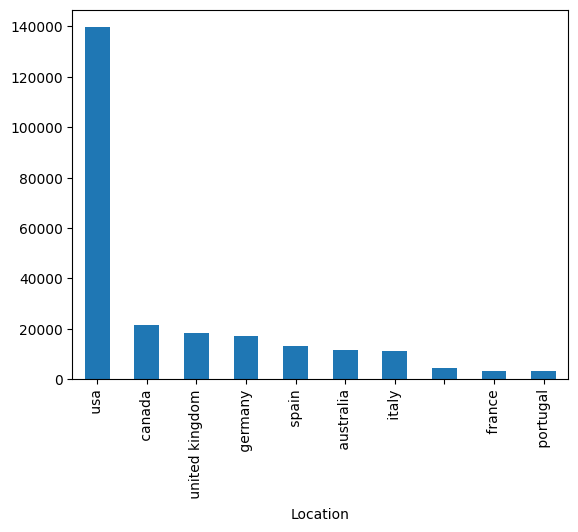

In [23]:
# top 10 user location 
users_df['Location'].value_counts().head(10).plot(kind='bar')

In [24]:
# null values 
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [25]:
# duplicate values
ratings_df.duplicated().sum()

0

# Recommendation systems

## 1. Popularity based recommendation system

In [26]:
# merge the data ratings and books based on 'ISBN' columns

ratings_books_name = ratings_df.merge(books_df,on='ISBN')

In [27]:
ratings_books_name.isnull().sum()

User-ID                    0
ISBN                       0
Book-Rating                0
Book-Title                 0
Book-Author                0
Publisher                  0
Image-URL-S                0
Image-URL-M                0
Image-URL-L                0
Publication_Date       14011
Year-Of-Publication    14011
dtype: int64

In [28]:
num_rating_df = ratings_books_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241049,Ã?Â?lpiraten.,2
241050,Ã?Â?rger mit Produkt X. Roman.,4
241051,Ã?Â?sterlich leben.,1
241052,Ã?Â?stlich der Berge.,3


In [29]:
avg_rating_df = (
    ratings_books_name.groupby("Book-Title")["Book-Rating"].mean().reset_index()
)
avg_rating_df.rename(columns={"Book-Rating": "avg_rating"}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241049,Ã?Â?lpiraten.,0.000000
241050,Ã?Â?rger mit Produkt X. Roman.,5.250000
241051,Ã?Â?sterlich leben.,7.000000
241052,Ã?Â?stlich der Berge.,2.666667


In [30]:
popular_df = num_rating_df.merge(avg_rating_df, on="Book-Title")
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241049,Ã?Â?lpiraten.,2,0.000000
241050,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241051,Ã?Â?sterlich leben.,1,7.000000
241052,Ã?Â?stlich der Berge.,3,2.666667


In [31]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df.head()

,Book-Title,num_ratings,avg_rating
80425,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80413,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80432,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80417,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80405,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [32]:
popular_df = popular_df.merge(books_df,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


## 2. Collaborative filtering based recommendation system

In [40]:
x = ratings_books_name.groupby('User-ID').count()['Book-Rating'] > 200
engaged_users = x[x].index

In [42]:
filtered_ratings = ratings_books_name[ratings_books_name['User-ID'].isin(engaged_users)]

In [45]:
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] > 50
famous_books = y[y].index

In [46]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [50]:
pivot_table = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [52]:
pivot_table.fillna(0,inplace=True)
pivot_table.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
similarity_scores = cosine_similarity(pivot_table)

In [62]:
def recommendFor(book_name, top=5):
    index = np.where(pivot_table.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:1+top]

    results = []
    for i in similar_items:
        item = {}
        temp_df = books_df[books_df['Book-Title'] == pivot_table.index[i[0]]]
        item['book_name'] = temp_df.drop_duplicates('Book-Title')['Book-Title'].values
        item['book_author'] = temp_df.drop_duplicates('Book-Title')['Book-Author'].values
        item['thumbnail'] = temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values

        results.append(item)

    return results

In [63]:
recommendFor('1984')

[{'book_name': array(['Animal Farm'], dtype=object),
  'book_author': array(['George Orwell'], dtype=object),
  'thumbnail': array(['http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
        dtype=object)},
 {'book_name': array(["The Handmaid's Tale"], dtype=object),
  'book_author': array(['Margaret Atwood'], dtype=object),
  'thumbnail': array(['http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
        dtype=object)},
 {'book_name': array(['Brave New World'], dtype=object),
  'book_author': array(['Aldous Huxley'], dtype=object),
  'thumbnail': array(['http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
        dtype=object)},
 {'book_name': array(['The Vampire Lestat (Vampire Chronicles, Book II)'], dtype=object),
  'book_author': array(['ANNE RICE'], dtype=object),
  'thumbnail': array(['http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
        dtype=object)},
 {'book_name': array(['The Hours : A Novel'], dtype=object),
  'book_

# Saving the models

In [66]:
# popularity model
pickle.dump(popular_df,open('../models/popular.pkl','wb'))

In [68]:
# collaborative model

books_df.drop_duplicates('Book-Title')

pickle.dump(pivot_table,open('../models/pivot_table.pkl','wb'))
pickle.dump(similarity_scores,open('../models/similarity_scores.pkl','wb'))
pickle.dump(books_df,open('../models/books_df.pkl','wb'))